<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Projetos-data-science-/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Cidade de Nova York*
Está na dúvida de onde ir?

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Airbnb é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

Airbnb permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países. Desde sua criação em Novembro de 2008 até Junho de 2012, mais de 10 milhões de reservas foram agendadas via Airbnb.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## New York city

É a cidade mais populosa do estado de Nova Iorque e dos Estados Unidos. Sua região metropolitana é uma das áreas metropolitanas mais populosas do mundo e é também a terceira cidade mais populosa da América, atrás de São Paulo e Cidade do México. A cidade exerce um impacto significativo sobre o comércio, finanças, mídia, arte, moda, pesquisa, tecnologia, educação e entretenimento de todo o planeta.

<center><img alt="New York" width="100%" src="https://upload.wikimedia.org/wikipedia/commons/2/2b/NYC_Downtown_Manhattan_Skyline_seen_from_Paulus_Hook_2019-12-20_IMG_7347_FRD_%28cropped%29.jpg"></center>

A cidade de Nova York é dividida em cinco distritos, que são o Bronx, Brooklyn, Manhattan, Queens e Staten Island. 

Cada bairro tem os mesmos limites que um condado do estado. Os governos do condado foram dissolvidos quando a cidade se consolidou em 1898, juntamente com todos os governos municipais e rurais de cada município. O termo bairro foi adotado para descrever uma forma única de administração governamental para cada uma das cinco partes constituintes fundamentais da cidade recém-consolidada.

##Como é morar em Nova York: saiba como é a vida por lá

Nova York é uma das cidades mais famosas dos Estados Unidos e do mundo, principalmente por causa de seu estilo de vida. Os filmes americanos reforçam o conceito cosmopolita que a Big Apple transpira e isso atrai, anualmente, milhões de turistas — foram 65 milhões só em 2018, de acordo com a agência local de marketing turístico. Mas como é morar em Nova York?

Para residir, é necessário dedicar mais tempo a pesquisas sobre o dia a dia, melhores bairros para encontrar um imóvel, qualidade e custo de vida, entre outras questões. Se você planeja se mudar para lá em breve, continue a leitura deste artigo.

<center><img alt="New York" width="100%" src="https://upload.wikimedia.org/wikipedia/commons/2/2b/NYC_Downtown_Manhattan_Skyline_seen_from_Paulus_Hook_2019-12-20_IMG_7347_FRD_%28cropped%29.jpg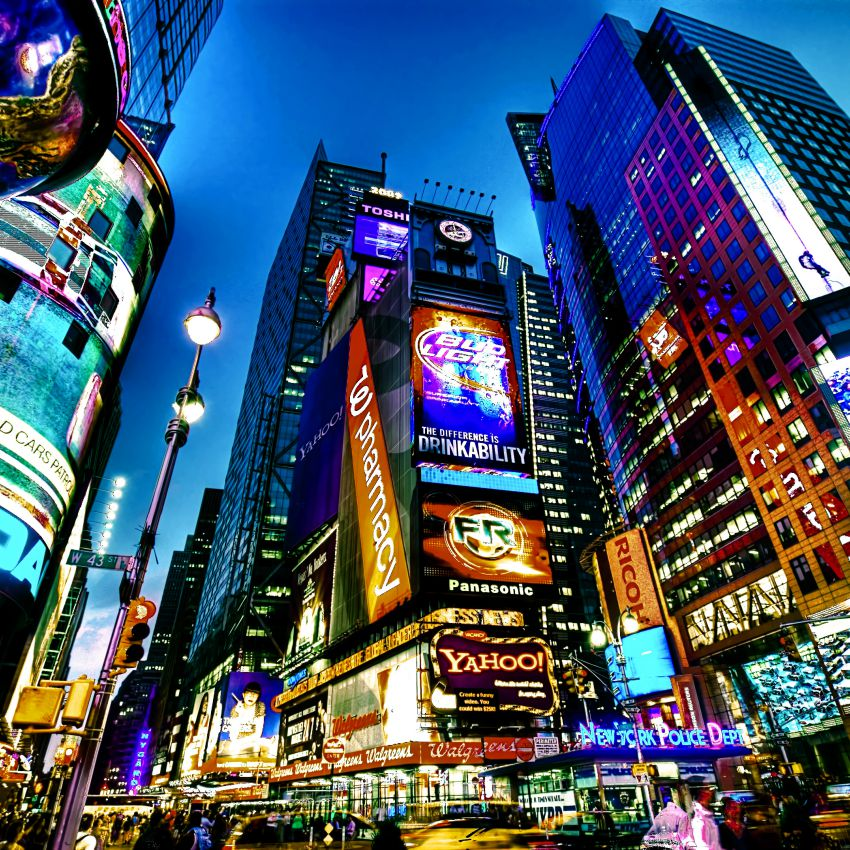"></center>

###O estilo de vida

Diferente dos brasileiros, que são conhecidos por sua amistosidade e receptividade, os americanos — em especial, os nova-iorquinos — são lembrados por sua personalidade mais polida e moderada. Geralmente, estão com pressa e andando rapidamente pelas ruas, com seus smartphones em uma mão e um copo de café na outra. Ser multifuncional é quase uma exigência para os nativos.

abe os pontos turísticos, como a Estátua da Liberdade? Dificilmente são conhecidos ou visitados por quem mora lá. Os locais preferem ir ao Empire State Building, no centro de Manhattan. O motivo da preferência é que os nova-iorquinos evitam, sempre que possível, lugares com aglomeração de pessoas. A cidade, por si só, já tem uma população bastante expressiva, por isso, a escolha pode ser considerada compreensível.

Outro ponto quase ignorado é a Times Square. Para fazer compras, preferem a Madison, a Fifth Avenue e, para cultura e entretenimento, alguns optam pelos shows da Broadway. Então, nos primeiros meses, talvez você estranhe alguns costumes do povo americano!

###Culinária
Os filmes mostram um hábito, de fato, comum na cidade — os nativos comem fora de casa com frequência — mas nem sempre é fast food, pelo contrário, a preocupação com a boa alimentação tem crescido entre quem mora na Big Apple. A vantagem é que ser uma das maiores metrópoles do mundo favorece a gastronomia: desde a culinária brasileira até a árabe, é encontrada lá e até em uma única avenida.

Uma opção bastante utilizada é o delivery, especialmente considerando que os moradores dão preferência ao que é ágil e prático. Se você também é adepto(a), aproveitará muito o benefício.

### Qualidade de vida

Para quem está em busca de qualidade de vida, como é morar em Nova York? Quando o assunto é segurança, a metrópole ainda é amedrontada pelo fantasma do terrorismo, mas, em contrapartida, desde 2017, a “cidade que nunca dorme” tem se tornado cada vez mais segura. A queda da criminalidade foi expressiva nos últimos anos e isso tem favorecido o turismo e o potencial do local para moradia.

Outra questão associada à qualidade de vida é o fato de Nova York ter muitos parques. Apesar das centenas de prédios, a cidade conta com diversas opções de lazer, bem além do famoso Central Park. Para citar alguns, vale a pena passar no Battery Park, localizado no extremo sul de Manhattan, no Washington Square Park, que já foi cenário de alguns seriados e filmes, e no Madison Square Park, com diversas atrações em seu interior, como um mercado italiano e um museu interativo.

### Custo de vida

Se você está pesquisando cidades para morar nos Estados Unidos e sua principal preocupação é o custo de vida, talvez, Nova York não seja a melhor opção. Para residir, ela é considerada uma das mais caras do mundo! O aluguel de um apartamento mobiliado em um bairro de classe média, por exemplo, custa a partir de `US$3` mil dólares. Em locais, como Brooklyn, esse valor diminui cerca de US$1 mil.

Outras despesas, como energia elétrica, água e internet custam, em média, de `US$200` a `US$250` por mês. O custo maior é com alimentação e lazer: naturalmente, comer fora é mais caro. No caso de Nova York, é 67% mais custoso para seu morador se alimentar em restaurantes. Já as compras feitas no supermercado não saem por menos de US$500 por mês.

Agora, se costuma gastar com passeios, como cinema, shows e idas ao teatro, a cidade é perfeita para você! Opções de arte não faltam por lá, mas elas têm um valor elevado — prepare-se para reservar de `US$400` a `US$500` do seu orçamento para curtir a programação da metrópole. Os valores mencionados são uma média, pois podem variar de acordo com o bairro e a preferência/necessidade do usuário, neste artigo irei mostar as médias dos alugueis que podem caber no seu bolso.

### **O Airbnb em NY
Por vários anos, a cidade e o estado de Nova York adotaram uma variedade de medidas legais em tentativas crescentes de reduzir o uso do Airbnb e a proliferação de aluguéis de curto prazo que a plataforma facilitou em toda a cidade de Nova York. O Airbnb tem sido alvo de extensa controvérsia e litígio em Nova York. Embora o Airbnb e seus usuários tenham elogiado os benefícios da renda suplementar para os anfitriões e diferentes benefícios da economia de compartilhamento de casas, legisladores, ativistas e outros citaram a piora da escassez de moradias acessíveis, bem como preocupações, incluindo segurança, zoneamento e arrecadação de impostos em torno do uso do Airbnb e da presença de locatários transitórios frequentes em edifícios residenciais e bairros.

O uso de imóveis residenciais para ocupantes transitórios de curto prazo levanta uma variedade de questões legais adicionais, das quais as especificidades estão além do escopo deste breve artigo. Os operadores hoteleiros têm obrigações especiais de manter seus hóspedes e vizinhos seguros que vão além das exigências impostas aos proprietários de edifícios residenciais regulares. Em parte devido aos seus requisitos elevados relacionados à segurança e a fatores como requisitos fiscais especiais, os operadores hoteleiros devem obter várias licenças específicas para manter seus negócios. O uso da plataforma Airbnb para efetivamente converter residências privadas em hotéis alternativos e ilegais para estadias de hóspedes de curto prazo contorna muitas das regras e encargos colocados sobre aqueles que operam hotéis legais. Isso não só gerou uma significativa oposição dos operadores de hotéis, bem como dos vizinhos em alguns edifícios residenciais frequentados pelos hóspedes do Airbnb. Além disso, dá origem a uma variedade de potenciais consequências legais por parte dos anfitriões do Airbnb e até mesmo de seus proprietários por violações de múltiplas leis de moradia e publicidade do Airbnb, bem como por implicações de segurança e impostos, entre outros. Uma dessas considerações adicionais é que, caso ocorra uma perda que envolva um ocupante transitório ilegal, o inquilino anfitrião e/ou o proprietário podem não ser cobertos pelo seguro e podem ser responsabilizados por cobrir diretamente tais perdas.


## **Obtenção dos Dados**




Os dados utilizados neste projeto foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


Observação importante: O site está em constante mudança, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Recomendo que acessem o site do airbnb para obter um novo link para uma nova análise.

Com isso em mente, vamos ao projeto.


### **Importar as bibliotecas**

As bibliotecas e pacotes Python são um conjunto de módulos e funções úteis que minimizam o uso de código em nossa vida cotidiana. 

In [ ]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# para utilizar os gráficos do plotly
import json
import plotly.express as px
from plotly import graph_objects as go
from urllib.request import urlopen



### **Importar os dados do Airbnb**

In [ ]:
# importar o arquivo do airbnb para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv", 
                 low_memory=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,322,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,408,2021-06-29,4.91,1,220,38,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.53,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,91,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,505,2021-10-20,3.70,1,218,31,NaN


### **Importar a Geolocalização de Nova York**

In [ ]:
# Importar a geolocalização disponível no site do airbnb para a biblioteca plotly
with urlopen("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/neighbourhoods.geojson") as response:
  geo = json.load(response)

## **Análise dos Dados**
Antes de começar qualquer análise, precisamos entender quais as variáveis e seus significados.

É importante criar um dicionário de variáveis para entendermos melhor o que vamos analizar e consultar de maneira mais eficiente cada variável e seu respectivo significado.

**Dicionário das variáveis**

* `id` - Número de identificação do imóvel;
* `name` - Nome da propriedade anunciada;
* `host_id` - Número de identificação do proprietário;
* `host_name` - Nome do proprietário;
* `neighbourhood_group` - zona da cidade;
* `neighbourhood` - Bairro da cidade;
* `latitude` - Coordenada da latitude do imóvel;
* `longitude` - Coordenada da longitude do imóvel;
* `room_type` - Informação sobre o tipo de imóvel oferecido;
* `price` - Preço de cada aluguel imóvel;
* `minimum_nights` - Quantidade mínima que o cliente precisa reservar;
* `number_of_reviews` - Número de reviews (opiniões) que a propriedade possui;
* `last_review` - Data do último review (opinião);
* `reviews_per_month` - Quantidade de reviews por cada mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietário;
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Visualização no mês anterior
* `license` - A coluna está com todos os valores ausentes

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### **Mostar as 5 primeiras entradas**

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,322,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,408,2021-06-29,4.91,1,220,38,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.53,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,91,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,505,2021-10-20,3.70,1,218,31,NaN


### **Mostrar as informações básicas de todas as colunas**

In [ ]:
# Informações básicas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37713 entries, 0 to 37712
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37713 non-null  int64  
 1   name                            37700 non-null  object 
 2   host_id                         37713 non-null  int64  
 3   host_name                       37682 non-null  object 
 4   neighbourhood_group             37713 non-null  object 
 5   neighbourhood                   37713 non-null  object 
 6   latitude                        37713 non-null  float64
 7   longitude                       37713 non-null  float64
 8   room_type                       37713 non-null  object 
 9   price                           37713 non-null  int64  
 10  minimum_nights                  37713 non-null  int64  
 11  number_of_reviews               37713 non-null  int64  
 12  last_review                     

### **Quantidade atributos (variáveis) e  entradas que o nosso conjunto de dados possui**

O conjunto de dados possui 37713 linhas e 18 colunas as quais serão analizadas.



In [ ]:
# identificar o volume de dados do DataFrame
print(f"Entradas: {df.shape[0]}") # 0 - contar as linhas
print(f"Variáveis:{df.shape[1]}") # 1 - contar as colunas


Entradas: 37713
Variáveis:18


In [ ]:
# verificar quais são as características das variáveis que serão analizados.
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Conseguimos identificar que nosso conjunto de dados possui variáveis numéricas e strings.

###  **Verificando a porcentagem de valores ausentes no *dataset.***
Frequentemente, quando acessamos um arquivo de dados, alguns valores estão ausentes. Isso pode ocorrer por vários motivos, incluindo questões de privacidade, erro humano e os respondentes da pesquisa se recusando ou não sabendo como responder. Lidar com dados ausentes é um problema comum e é uma etapa importante na preparação dos dados para conseguirmos tirar bons insights.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print("Os valores ausentes no dataset em %:")
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Os valores ausentes no dataset em %:


license                           0.999973
reviews_per_month                 0.244266
last_review                       0.244266
host_name                         0.000822
name                              0.000345
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Verificamos que a variável (licence) possui 100% dos valores ausentes, quando isso acontece podemos remover a variável da nossa análise.

As variáveis (reviews_per_month e last_review) possuem quase 25% dos valores ausentes, podemos realizar algum tipo de tratamento estatístico para essas variáveis, assim como a variável host_name e name.

Variáveis com baixo poder preditivo podem ser excluídas.

### **Excluindo os valores faltantes sem relevância preditiva**



In [ ]:
# excluindo colunas com dados faltantes
df.drop(columns=['reviews_per_month', 'last_review', 'license'], inplace=True)


In [ ]:
# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)


### **Verificando o resultado**

In [ ]:
# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Feita a limpeza, agora vamos para o tratamento de Outliers

## **Limpando Outliers**

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Vamos dar uma olhada nos nossos dados e ver o que identificamos.

### Distribuição estatística

In [ ]:
# verificando a distribuição estatística
df.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,37669.0,37669.0,37669.0,37669.0,37669.0,37669.0,37669.0,37669.0,37669.0,37669.0
mean,28845170.5,111815241.3,40.7,-73.9,165.2,22.1,23.3,16.2,129.7,4.7
std,17109151.2,127258796.7,0.1,0.1,292.3,30.8,50.2,54.7,141.7,14.3
min,2595.0,2438.0,40.5,-74.2,0.0,1.0,0.0,1.0,0.0,0.0
25%,13101855.0,11105949.0,40.7,-74.0,69.0,3.0,1.0,1.0,0.0,0.0
50%,29965481.0,48866651.0,40.7,-74.0,110.0,30.0,4.0,1.0,67.0,0.0
75%,45480607.0,191577969.0,40.8,-73.9,180.0,30.0,20.0,3.0,294.0,3.0
max,53127631.0,429840131.0,40.9,-73.7,10000.0,1250.0,1009.0,391.0,365.0,624.0


### **Visualizando qual o tipo de distribuição das variáveis** 

### Aqui, algumas coisas já chamam a nossa atenção, como por exemplo:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o Q3 está em 180 dólares, mas o máximo está em 10 mil dórales. Claramente, há outliers por aqui.
* A variável `minimum_nights` tem como seu máximo o valor 1250, sendo que o Q3 está em 30. Claramente temos outliers nessa variável.
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também podem conter outliers, mas não vamos nos preocupar com elas agora.

### Verificando as distribuições

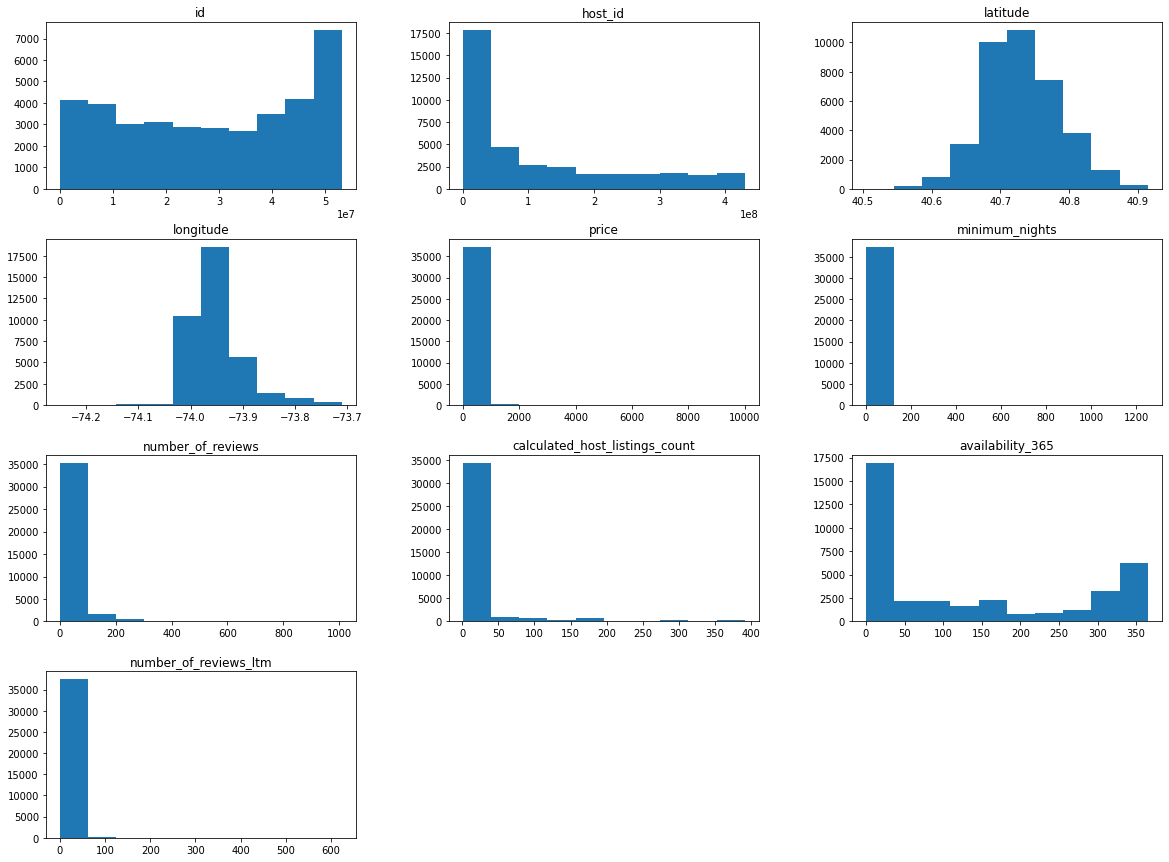

In [ ]:
# verificando as distribuições
df.hist(figsize=(20,15), grid=False);

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.


In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  111.0
Limite superior de price:  346.5
Limite inferior de price:  -97.5


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

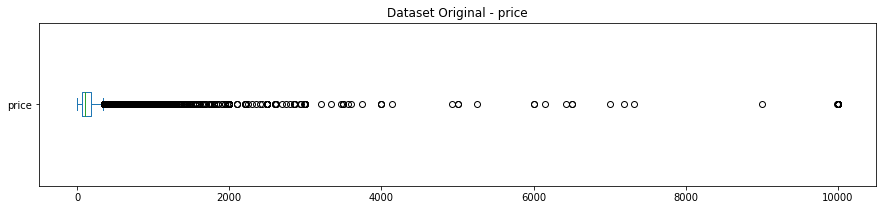

O dataset possui 37669 colunas
2854 Entradas acima de 335.5
Representam 7.58 % do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print(f"O dataset possui {(df.shape[0])} colunas")
print(f"{(len(df[df.price > 335.5]))} Entradas acima de 335.5")
print(f"Representam {(len(df[df.price > 335.5]) / df.shape[0])*100:.2f} % do dataset")

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  27.0
Limite superior de minimum_nights:  70.5
Limite inferior de minimum_nights:  -37.5


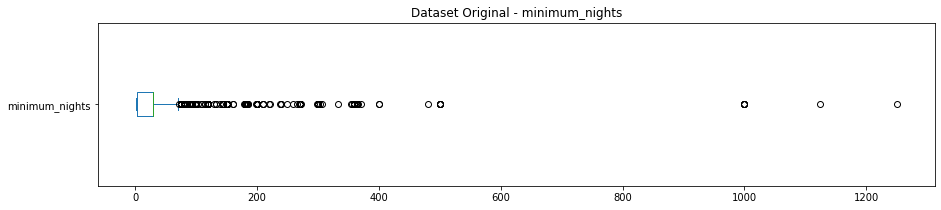

O dataset possui 37669 colunas
23047 Entradas acima de 335.5
Representam 61.18 % do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print(f"O dataset possui {df.shape[0]} colunas")
print(f"{len(df[df.minimum_nights > 12.0])} Entradas acima de 335.5")
print(f"Representam {(len(df[df.minimum_nights > 12.0]) / df.shape[0])*100:.2f} % do dataset")

In [ ]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 335.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 12].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)


Shape antes da limpeza:  (37669, 15)
Shape após a limpeza:  (13154, 15)


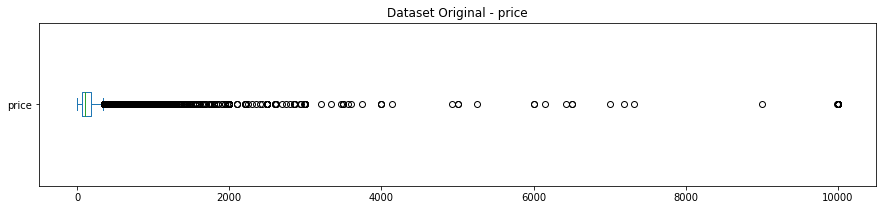

O dataset possui 37669 colunas
2854 Entradas acima de 335.5
Representam 7.58 % do dataset


In [ ]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print(f"O dataset possui {df.shape[0]} colunas")
print(f"{len(df[df.price > 335.5])} Entradas acima de 335.5")
print(f"Representam {(len(df[df.price > 335.5]) / df.shape[0])*100:.2f} % do dataset")

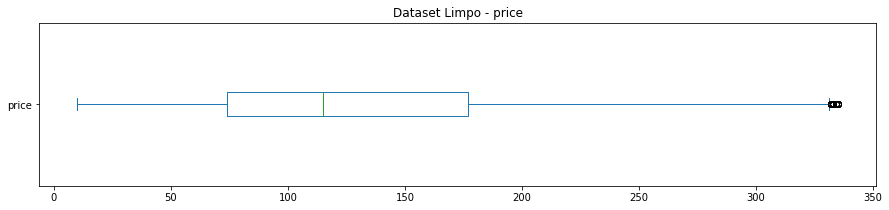

Tamanho original: 37669 colunas
Tamanho atual: 13154 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print(f"Tamanho original: {df.shape[0]} colunas")
print(f"Tamanho atual: {df_clean.shape[0]} colunas")

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis dos dados originais.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

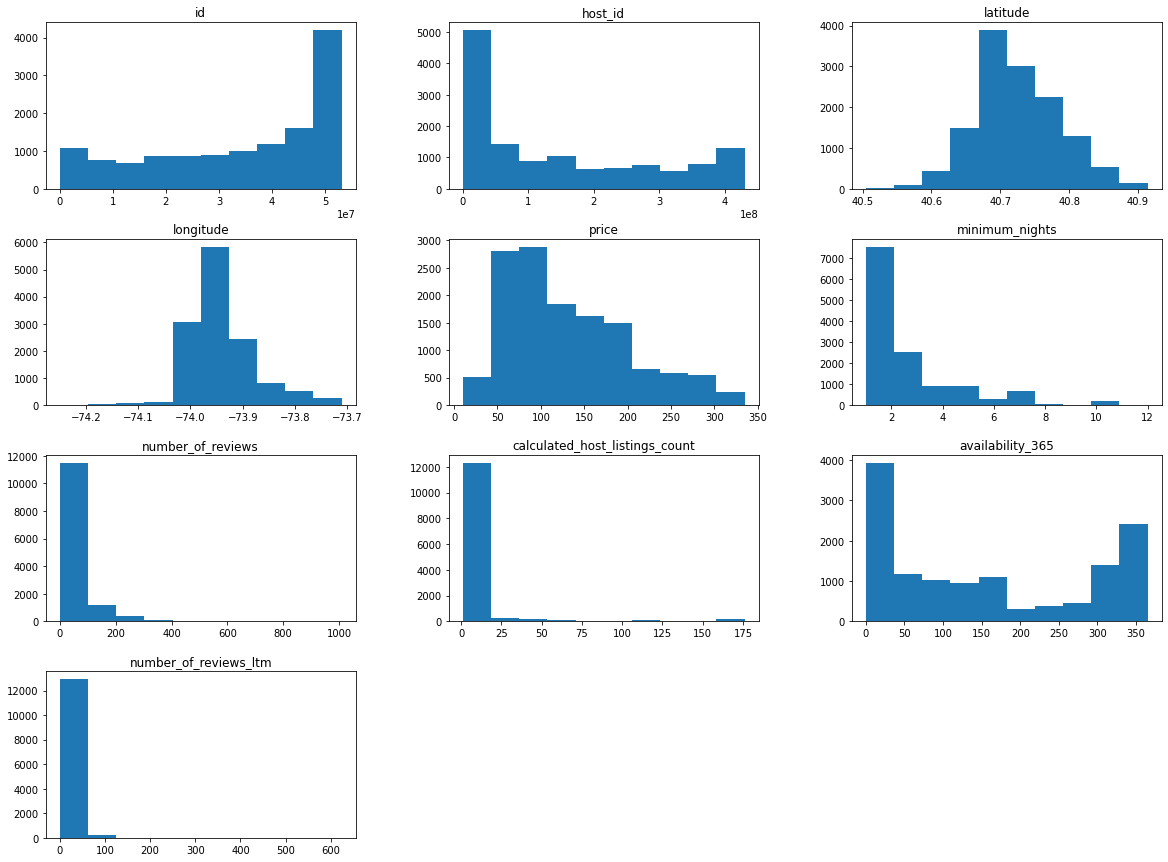

In [ ]:
# verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,13154.0,13154.0,13154.0,13154.0,13154.0,13154.0,13154.0,13154.0,13154.0,13154.0
mean,34218950.9,144588549.0,40.7,-73.9,130.9,2.7,41.5,7.2,155.2,11.6
std,16816004.9,142720316.6,0.1,0.1,71.2,1.9,68.7,23.2,136.0,21.9
min,3831.0,2571.0,40.5,-74.2,10.0,1.0,0.0,1.0,0.0,0.0
25%,20651837.5,16677326.0,40.7,-74.0,74.0,1.0,2.0,1.0,17.0,0.0
50%,39318358.5,89686026.5,40.7,-73.9,115.0,2.0,13.0,1.0,124.0,4.0
75%,49683735.0,262060162.0,40.8,-73.9,177.0,3.0,51.0,3.0,308.0,16.0
max,53117070.0,429840131.0,40.9,-73.7,335.0,12.0,1009.0,176.0,365.0,624.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana da variável `price` foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
* A média da variável `price` foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

## Informações Importantes

* Modelos lineares são mais sensíveis aos outliers. Ao trabalhar com modelos desse tipo é essencial que o trabalho com outliers seja feito com bastante atenção. (Linear Regression, Logistic Regression)

* Modelos baseados em árvores de decisão são menos sensívels a outliers. (Decision Trees, Random Forest, SVM, KNN)

* Técnicas de pré-processamento como Normalização e Padronização ajudam em relação aos outliers.

### **A média dos preços de aluguel**

In [ ]:
print(f' A média dos preços em Nova York: {df_clean.price.mean()}')

 A média dos preços em Nova York: 130.90573209670063


### **A correlação existente entre as variáveis**

Uma matriz de correlação é uma tabela que indica os coeficientes de conexão entre os fatores. Cada célula da tabela mostra a conexão entre os dois fatores.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.041986,-0.058838,0.105546,0.031287
minimum_nights,0.041986,1.000000,-0.099712,-0.097338,-0.136353
number_of_reviews,-0.058838,-0.099712,1.000000,-0.090625,0.078063
calculated_host_listings_count,0.105546,-0.097338,-0.090625,1.000000,0.002900
availability_365,0.031287,-0.136353,0.078063,0.002900,1.000000


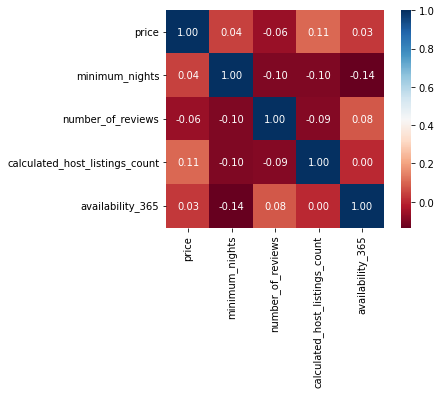

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **O tipo de imóvel mais alugado no Airbnb**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6483
Private room       6342
Shared room         232
Hotel room           97
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.492854
Private room       0.482135
Shared room        0.017637
Hotel room         0.007374
Name: room_type, dtype: float64

### **A localidade mais cara do dataset**
Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Neponsit             295.000000
DUMBO                263.666667
Flatiron District    247.700000
NoHo                 223.500000
Tribeca              218.416667
Downtown Brooklyn    214.066667
West Village         208.012658
Greenwich Village    206.878788
Theater District     205.431193
Civic Center         202.000000
Name: price, dtype: float64


Acima vemos o bairro Neponsit que é um pequeno bairro rico localizado na metade oeste da Península Rockaway, a área mais ao sul do bairro de Queens, em Nova York. A área começa na Rua Beach 142 e termina na Rua Praia 149.

### **A média do mínimo de noites para aluguel (minimum_nights)**

In [ ]:
print(f'A média do mínimo de noites: {df_clean.minimum_nights.mean():.2f}')

A média do mínimo de noites: 2.72


## Conclusões

Com a execução do projeto, alguns insights podem ser retirados dessa análise como: 

Análise exploratória: Os dados possuem alguns valores faltantes, foi necessário realizar alguns procedimentos de limpeza e tratamento dos dados.

Possíveis Insights: 
* O preço médio de aluguel dos imóveis em Nova York é de US$ 130,00;
* O tipo de imóvel mais procurado é casa/apartamento com cerca de 50 % dos aluguéis;
* O segundo tipo de imóvel mais alugado é "private room" com cerca de 48 % dos aluguéis;
* A média do mínimo de noites que cada hospede aluga seu imóvel é de 3 dias.

Em relação a localidade mais cara de Nova york, o bairro Neponsit é a região mais cara de Nova York, seguido de DUMBO que é um acrônimo para Down Under the Manhattan Bridge, com ruas de paralelepípedos e arquitetura dramática de seus dias industriais. Em vez de fábricas, DUMBO de hoje dispõe de galerias de arte, livrarias independentes, boutiques, confeitos e espaços de trabalho.

Flatiron District é um bairro localizado nas redondezas de Manhattan, geralmente os apartamentos localizados na região de Manhattan são mais caros.

Os inights que tiramos foram coerentes com as informações reais da cidade, realizar um bom tratamento de dados pode supear qualquer modelo de Machine Learning.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.










